In [108]:
from bs4 import BeautifulSoup
import requests
from PIL import Image
import os
import re
from tqdm import tqdm

In [3]:
Searchlink="https://www.google.com/search?q="
whatyouwannasearch="T-64"
googleimage="&tbm=isch&ved=2ahUKEwiyq5mu396DAxWqwaACHWsuC6IQ2-cCegQIABAA&oq=t34&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQ6DggAEIAEEIoFELEDEIMBOggIABCABBCxA1CeBFinCmDlC2gAcAB4AYABR4gByAGSAQEzmAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=1c2kZfLsG6qDg8UP69yskAo&bih=675&biw=1396"
header = {
    'User-Agent':
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"
}

r=requests.get(f'{Searchlink}{whatyouwannasearch}{googleimage}', headers=header, timeout=20)

In [110]:
requests.get(f'{Searchlink}{whatyouwannasearch}{googleimage}', headers=header, timeout=20)

ConnectionError: HTTPSConnectionPool(host='www.google.com', port=443): Max retries exceeded with url: /search?q=T-64&tbm=isch&ved=2ahUKEwiyq5mu396DAxWqwaACHWsuC6IQ2-cCegQIABAA&oq=t34&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQ6DggAEIAEEIoFELEDEIMBOggIABCABBCxA1CeBFinCmDlC2gAcAB4AYABR4gByAGSAQEzmAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=1c2kZfLsG6qDg8UP69yskAo&bih=675&biw=1396 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000026D783DF2D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

<!DOCTYPE html>
<html dir="ltr" itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-US">
 <head>
  <base href="https://www.google.com/"/>
  <meta content="origin" name="referrer"/>
  <script data-id="_gd" nonce="hpaeLUxe9qMjgmE8XLrbqw">
   window.WIZ_global_data = {"ALgnxe":[48872564,72473841,72334000,72473675,72412704,72453055,4659596,72410956,72438204,72394951,48601621,72420183,72434419,72453983,72383452,72421566,72407874,72456843,72420327,72441033,72444298,72358324,93864907,4913712,72349409,72323476,72429945,4629446,4986674,72373039,72454589,26484123,4650101,48585937,72437219,47039886,4734049,4750932,72442338,72455156,72280684,72448480,93826865,72290104,72346051,72451090,4995712,72398333,47848582,4791182,72456869,72369888,1717484,72342776,4895436,72429106,72407543,48887082,72428369,72443628,1714241,72440199,72412175,72464355,3373084,72348909,72354980,48661138,72402176,72367343,10208620,72446974,72457559,48855367,4920683,72450416,4534494,48533758,72424466,4583312,724
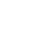
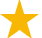
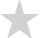
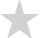
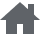
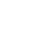

In [128]:
#r=requests.get(f'{Searchlink}{whatyouwannasearch}{googleimage}', headers=header)
soup=BeautifulSoup(r.content, "html5lib").prettify()
print(soup)

In [63]:
temp=re.findall(r'\[\"https://encrypted[^,]+\",\d{1,10},\d{1,10}],\[\"https://[^,]+,\d{1,10},\d{1,10}]', soup)
targeturl=[re.findall(r'https://[^\"]+', i)[1] for i in temp]

In [168]:
class imagedownloader:
    def __init__(self, whatyouwannasearch: str=None):
        if whatyouwannasearch==None: raise ValueError("Input what you gonna search!")
        
        self.whatyouwannasearch=whatyouwannasearch
        self.getURL()
        self.r=self.getrequest()
    
    def getURL(self):
        googlesearch="https://www.google.com/search?q="
        googleimagething="&tbm=isch&ved=2ahUKEwiyq5mu396DAxWqwaACHWsuC6IQ2-cCegQIABAA&oq=t34&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQ6DggAEIAEEIoFELEDEIMBOggIABCABBCxA1CeBFinCmDlC2gAcAB4AYABR4gByAGSAQEzmAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=1c2kZfLsG6qDg8UP69yskAo&bih=675&biw=1396"
        self.googleimageURL=f'{googlesearch}{self.whatyouwannasearch}{googleimagething}'
    
    def getrequest(self):
        self.header = {'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"}

        try:
            r=requests.get(self.googleimageURL, headers=self.header, timeout=20)
            if r.status_code == 200:
                return r
        except ConnectionError:
            print("Check Your Connection")
    
    def start(self, 
              n: int=1, 
              savepath: str=""):
        '''
        n: int on range of 1 to 75.\n
        savepath: location of where the images are gonna be downloaded. Default on current directory.
        '''
        if n<1 or n>=75: raise ValueError("Womp womp!")
        self.n=n
        self.savepath=savepath
        self.getimagelink()
        self.saveimage()

    def getimagelink(self):
        soup=BeautifulSoup(self.r.content, "html5lib").prettify()
        temp=re.findall(r'\[\"https://encrypted[^,]+\",\d{1,10},\d{1,10}],\[\"https://[^,]+,\d{1,10},\d{1,10}]', soup)
        self.targeturl=[re.findall(r'https://[^\"]+', i)[1] for i in temp]
    
    def saveimage(self):
        counter=0
        index=-1
        idkbro=f'{self.savepath}{self.whatyouwannasearch}'
        try:
            os.makedirs(idkbro)
        except:
            pass

        progress_bar = tqdm(total=self.n, desc="Processing")
        
        while self.n>counter:
            index+=1
            extensiontype=None
            for extension in [".jpg", ".png", ".jpeg"]:
                if re.search(extension, self.targeturl[index]):  
                    extensiontype=extension; break
                    
            if extensiontype==None: continue
            r_image=requests.get(self.targeturl[index], headers=self.header, timeout=10)
            if r_image.status_code==200:    
                with open(f'{idkbro}/{counter}{extensiontype}',"wb") as br:
                    br.write(r_image.content)
            else: print(f'Failed to download {str(self.targeturl[index])}')
            counter+=1
            progress_bar.update(1)

        progress_bar.close()
    
    def __str__(self):
        return f'You\'re looking for {self.whatyouwannasearch}.'

In [169]:
test=imagedownloader("T-72B")